In [1]:
# Importing the required libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [3]:
#Load the data

In [30]:
df=pd.read_csv('TATAGLOBAL.BO.csv')
df=df.head(30)

In [32]:
df.shape

(30, 7)

In [5]:
# Create the list / x and y datset

In [33]:
df.shape

(30, 7)

In [34]:
df.tail(1)

,Date,Open,High,Low,Close,Adj Close,Volume
29,2012-07-09,117.050003,117.5,113.699997,114.099998,100.180862,295348.0


In [35]:
# Get all of the data except for the last row

In [36]:
df=df.head(len(df)-1)
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-05-29,112.599998,114.400002,109.150002,109.900002,96.493225,225822.0
1,2012-05-30,109.849998,110.550003,107.000000,107.400002,94.298195,115051.0
2,2012-05-31,106.500000,109.199997,106.500000,107.800003,94.649391,134958.0
3,2012-06-01,108.099998,109.099998,104.949997,105.550003,92.673882,162538.0
4,2012-06-04,104.449997,105.699997,102.500000,104.699997,91.927574,140364.0
5,2012-06-05,104.900002,107.699997,104.000000,105.199997,92.366585,183330.0
6,2012-06-06,105.300003,108.750000,105.300003,108.050003,94.868919,161023.0
7,2012-06-07,116.900002,116.900002,108.000000,109.199997,95.878616,193018.0
8,2012-06-08,109.949997,112.650002,107.250000,111.949997,98.293129,542449.0
9,2012-06-11,113.500000,114.150002,110.150002,110.900002,97.371231,240203.0


In [37]:
# The new Shape of the data
df.shape

(29, 7)

In [38]:
#Get all of the rows from the Date column
df_dates=df.loc[:,'Date']
df_dates.head()

0    2012-05-29
1    2012-05-30
2    2012-05-31
3    2012-06-01
4    2012-06-04
Name: Date, dtype: object

In [39]:
# Get all of the rows from the open column
df_open=df.loc[:,'Open']

In [40]:
dates=[]
prices=[]

In [41]:
# Create the Independent data set X

In [42]:
for date in df_dates:
    dates.append([int(date.split('-')[2])])

In [43]:
dates

[[29],
 [30],
 [31],
 [1],
 [4],
 [5],
 [6],
 [7],
 [8],
 [11],
 [12],
 [13],
 [14],
 [15],
 [18],
 [19],
 [20],
 [21],
 [22],
 [25],
 [26],
 [27],
 [28],
 [29],
 [2],
 [3],
 [4],
 [5],
 [6]]

In [44]:
# Create the dependent data set 'y'

In [45]:
for open_price in df_open:
    prices.append(float(open_price))

In [46]:
prices

[112.599998,
 109.849998,
 106.5,
 108.099998,
 104.449997,
 104.900002,
 105.300003,
 116.900002,
 109.949997,
 113.5,
 110.0,
 112.5,
 108.0,
 107.5,
 108.800003,
 108.300003,
 105.949997,
 108.099998,
 109.5,
 109.900002,
 109.849998,
 116.699997,
 117.0,
 118.25,
 114.949997,
 117.0,
 120.0,
 118.75,
 119.150002]

In [53]:
def predict_prices(dates,prices,x):
    # Create the 3 Support Vector Regression Models
    svr_lin=SVR(kernel='linear',C=1e3)
    svr_poly=SVR(kernel='poly',C=1e3, degree=2)
    svr_rbf=SVR(kernel='rbf',C=1e3,gamma=0.1)
    
    # Train the SVR models
    svr_lin.fit(dates,prices)
    svr_poly.fit(dates,prices)
    svr_rbf.fit(dates,prices)
    
    # Create the Linear Regression model

    lin_reg= LinearRegression()
    
    # Train the linear Regression model
    
    lin_reg.fit(dates,prices)
    
    plt.figure(figsize=(15,8))
    
    plt.scatter(dates,prices, color='black', label='Date')

    plt.plot(dates, svr_rbf.predict(dates),color='red', label='SVR_RBF')
    plt.plot(dates, svr_poly.predict(dates),color='blue', label='SVR_poly')
    plt.plot(dates, svr_lin.predict(dates),color='green', label='SVR_linear')
    plt.plot(dates, lin_reg.predict(dates),color='orange', label='linear-reg')

    plt.xlabel('Days')
    plt.ylabel('Price')
    plt.title('Regression')
    plt.legend()
    plt.show()

    return svr_rbf.predict(x)[0],svr_lin.predict(x)[0],svr_poly.predict(x)[0],lin_reg.predict(x)[0]

    
    

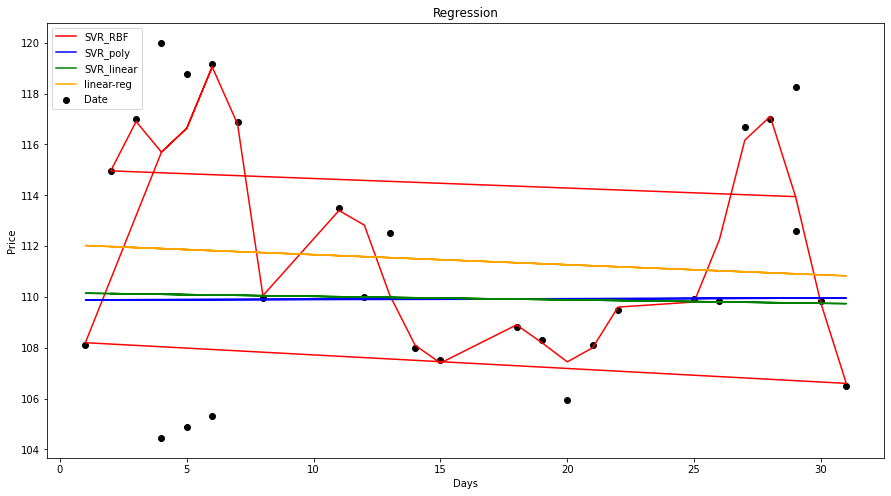

(117.09984518594621, 109.77727063626412, 109.94540336732268, 110.94919247944665)


In [54]:
# predict the price of on 28 days
predict_price=predict_prices(dates,prices,[[28]])
print(predict_price)